In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [3]:
train = pd.read_csv(r'C:\Users\shala\OneDrive\Documents\CSE519\house-prices-advanced-regression-techniques\train.csv')

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [22]:
# Part 1
train_col = train[['SalePrice', 'OverallQual', 'FullBath', 'YearBuilt', 'GarageYrBlt', 'BedroomAbvGr', 'GarageArea', 'GarageCars', 'GrLivArea', 'Fireplaces', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF']]

In [23]:
train_col

,SalePrice,OverallQual,FullBath,YearBuilt,GarageYrBlt,BedroomAbvGr,GarageArea,GarageCars,GrLivArea,Fireplaces,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF
0,208500,7,2,2003,2003.0,3,548,2,1710,0,8,856,856
1,181500,6,2,1976,1976.0,3,460,2,1262,1,6,1262,1262
2,223500,7,2,2001,2001.0,3,608,2,1786,1,6,920,920
3,140000,7,1,1915,1998.0,3,642,3,1717,1,7,756,961
4,250000,8,2,2000,2000.0,4,836,3,2198,1,9,1145,1145
5,143000,5,1,1993,1993.0,1,480,2,1362,0,5,796,796
6,307000,8,2,2004,2004.0,3,636,2,1694,1,7,1686,1694
7,200000,7,2,1973,1973.0,3,484,2,2090,2,7,1107,1107
8,129900,7,2,1931,1931.0,2,468,2,1774,2,8,952,1022
9,118000,5,1,1939,1939.0,2,205,1,1077,2,5,991,1077


In [24]:
corr = train_col.corr(method ='pearson')

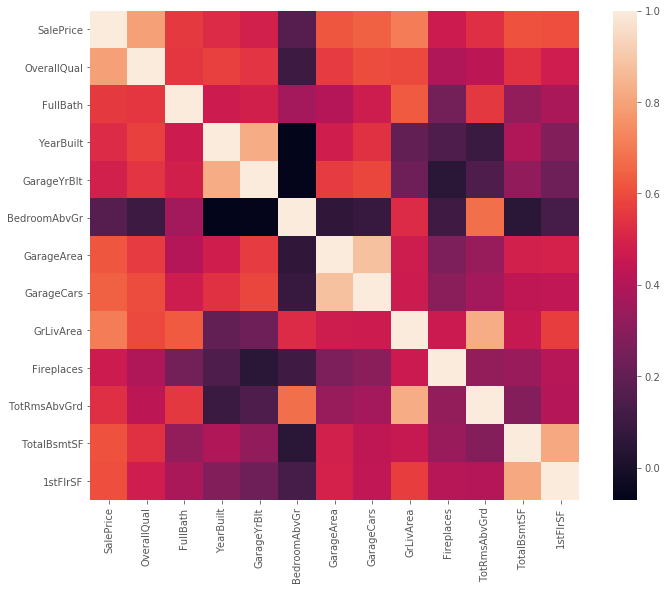

In [26]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True)
plt.show()

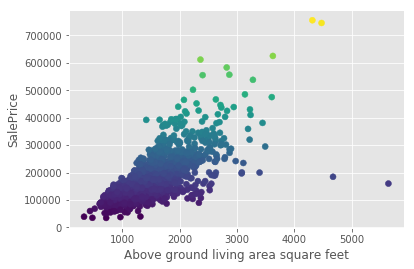

In [45]:
# Part 2
x = train['GrLivArea']
y = train['SalePrice']
plt.scatter(x, y, c=y)
plt.xlabel('Above ground living area square feet')
plt.ylabel('SalePrice')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

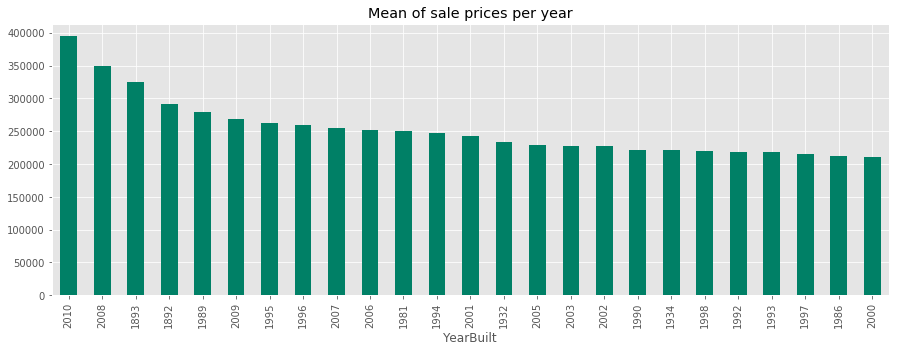

In [40]:
train.groupby('YearBuilt') \
    .mean()['SalePrice'] \
    .sort_values(ascending=False) \
    .head(25) \
    .plot(kind='bar', title='Mean of sale prices per year', figsize = (15,5), colormap = 'summer')
plt.show

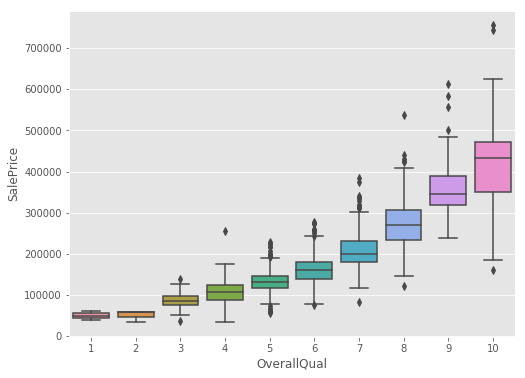

In [42]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)


f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.show()

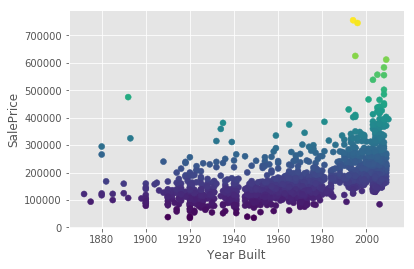

In [52]:
x = train['YearBuilt']
y = train['SalePrice']
plt.scatter(x, y, c=y)
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

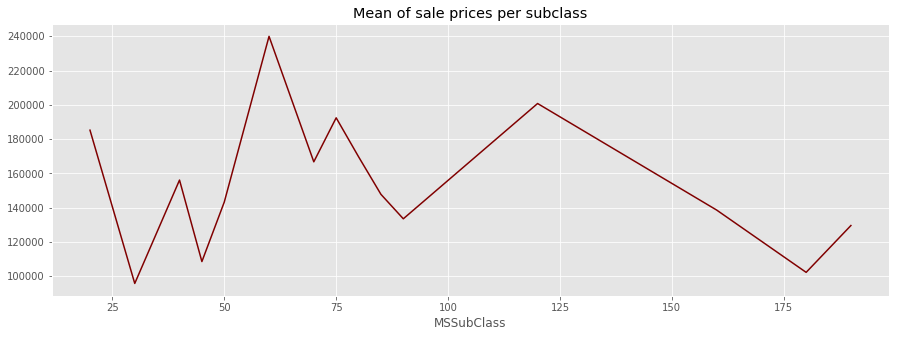

In [62]:
train.groupby('MSSubClass') \
    .mean()['SalePrice'] \
    .plot(kind='line', title='Mean of sale prices per subclass', figsize = (15,5), color = 'maroon')
plt.show

Sub-Class 60 has the highest sale price - 2-STORY 1946 & NEWER

In [ ]:
# Part 3
